In [1]:
import numpy as np
from dataset.mnist import load_mnist



# from tensorflow.keras.datasets import mnist

# def overlay_y_on_x(x, y):
#     """
#     Replace the first 10 pixels of data [x] with one-hot-encoded label [y]
#     """
#     x_ = x.clone()
#     x_[:, :10] *= 0.0
#     x_[range(x.shape[0]), y] = x.max()
#     return x_
# 假设x,y是numpy数组, 用numpy重写
def overlay_y_on_x(x, y):
    """
    Replace the first 10 pixels of data [x] with one-hot-encoded label [y]
    """
    
    x_ = x.copy()
    y_ = y.copy()
    y_ = y_ * x.max()
    x_[:, :10] = y_
    # x_[range(x.shape[0]), y] = x.max()
    return x_

# class LossFunction:
#     def __init__(self):
#         pass
    
#     def loss(self, Y_pos, Y_neg):
#         return np.sum(- Y_pos ** 2 + Y_neg ** 2)
    
#     def compute_gradients(self, X_pos, X_neg, W, B):
#         # 计算 Y_pos 和 Y_neg
#         Y_pos = np.dot(X_pos, W) + B
#         Y_neg = np.dot(X_neg, W) + B
        
#         # 计算损失函数
#         loss = self.loss(Y_pos, Y_neg)
        
#         # 计算损失函数对 W 的梯度
#         dW = - np.dot(X_pos.T, 2 * Y_pos * (Y_pos > 0))  + np.dot(X_neg.T, 2 * Y_neg * (Y_neg > 0))
        
#         # 计算损失函数对 B 的梯度
#         # print(Y_pos.shape, Y_neg.shape)
#         dB = np.sum(- Y_pos * (Y_pos > 0), axis=0) + np.sum(Y_neg * (Y_neg > 0), axis=0) 
#         # print(dB.shape)
        
#         return loss, dW, dB

def relu(x):
    return np.maximum(0, x)

class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0

    def update(self, params, grads):
        if self.m is None:
            self.m = [0] * len(params)
            self.v = [0] * len(params)

        self.t += 1
        for i, (param, grad) in enumerate(zip(params, grads)):
            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * grad
            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * grad**2
            m_hat = self.m[i] / (1 - self.beta1**self.t)
            v_hat = self.v[i] / (1 - self.beta2**self.t)
            params[i] -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

# # 示例使用
# input_dim = 2
# output_dim = 1
# threshold = 0.5
# layer = CustomLayer(input_dim, output_dim, threshold)


# X_pos = np.array([[1, 2], [3, 4]])
# X_neg = np.array([[5, 6], [7, 8]])

# for epoch in range(100):
#     loss = layer.forward(X_pos, X_neg)
#     dloss_W, dloss_B = layer.backward()
#     optimizer.update([layer.W, layer.B], [dloss_W, dloss_B])
#     if epoch % 10 == 0:
#         print(f"Epoch {epoch}, Loss: {loss}")


# 定义ff神经网络单层结构
class FFLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        
        # 初始化权重和偏置
        self.W = np.random.randn(input_size, output_size)
        self.B = np.zeros((1, output_size))
        
        # 初始化损失函数对象
        # self.loss_function = LossFunction()
        self.optimizer = AdamOptimizer(learning_rate=1e-3)

    def loss(self, Y_pos, Y_neg):
        return np.sum(- Y_pos ** 2 + Y_neg ** 2)

    def forward(self, X):
        # X = (X - X.min(1).reshape(X.shape[0],-1)) / (X.max(1).reshape(X.shape[0],-1) - X.min(1).reshape(X.shape[0],-1))
        # 计算 Y
        Y = np.dot(X, self.W) + self.B
        
        return relu(Y)

    def backward(self, X_pos, X_neg, W, B):
        # 计算 Y_pos 和 Y_neg
        Y_pos = self.forward(X_pos) #np.dot(X_pos, W) + B
        Y_neg = self.forward(X_neg) #np.dot(X_neg, W) + B
        
        # 计算损失函数
        loss = self.loss(Y_pos, Y_neg)
        
        # 计算损失函数对 W 的梯度
        dW = - np.dot(X_pos.T, 2 * Y_pos * (Y_pos > 0)) + np.dot(X_neg.T, 2 * Y_neg * (Y_neg > 0))
        
        # 计算损失函数对 B 的梯度
        # print(Y_pos.shape, Y_neg.shape)
        dB = np.sum(- Y_pos * (Y_pos > 0), axis=0) + np.sum(Y_neg * (Y_neg > 0), axis=0) 
        # print(dB.shape)
        
        return loss, dW, dB
    
    def train(self, X_train_pos, X_train_neg, num_epochs=10):
        for epoch in range(num_epochs):
            # 计算梯度
            loss, dW, dB = self.backward(X_train_pos, X_train_neg, self.W, self.B)
            
            # 更新参数
            # self.W -= learning_rate * dW
            # self.B -= learning_rate * dB
            self.optimizer.update([self.W, self.B], [dW, dB])
            
            # 打印损失
            # if (epoch+1) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}')

            # # 评估模型
            # # if (epoch+1) % 10 == 0:
            # y_pred =  self.predict(X_test)
            # y_true = np.argmax(y_test, axis=1)
            # accuracy = self.eval(y_pred, y_true)

            # print(y_pred, y_true)
            # print('\n', y_pred[:30], '\n', y_true[:30])
            # print(f'Accuracy: {accuracy:.4f}')
        return self.forward(X_train_pos), self.forward(X_train_neg)


# class FFLayer:
#     def __init__(self, input_dim, output_dim, threshold=2.0):
#         self.W = np.random.randn(input_dim, output_dim) * 0.01
#         self.B = np.zeros(output_dim)
#         self.threshold = threshold
#         self.X_pos = None
#         self.X_.weight/ (1 + np.exp(-x))
    
#     def forward(self, X):
#         # 正向传播
#         Y = np.dot(X, self.W) + self.B
#         return Y

#     def loss(self, y_pos, y_neg):
#         # 正向传播
#         # y_pos = self.forward(X_pos)
#         # y_neg = self.forward(X_neg)
#         a = -np.mean(y_pos**2) + self.threshold
#         b = np.mean(y_neg**2) - self.threshold
#         loss = np.log(1 + np.exp(a)) + np.log(1 + np.exp(b))
#         self.cache = (a, b)
#         return loss

#     def backward(self):
#         # 反向传播
#         X_pos, X_neg, y_pos, y_neg = self.X_pos, self.X_neg, self.y_pos, self.y_neg 
#         a, b = self.cache
#         n = len(y_pos)
#         da = self.sigmoid(a)
#         db = self.sigmoid(b)
#         dloss_y_pos = -2 / n * y_pos * da
#         dloss_y_neg = 2 / n * y_neg * db
#         dloss_W_pos = np.dot(X_pos.T, dloss_y_pos)
#         dloss_W_neg = np.dot(X_neg.T, dloss_y_neg)
#         dloss_W = dloss_W_pos + dloss_W_neg
#         dloss_B_pos = np.sum(dloss_y_pos)
#         dloss_B_neg = np.sum(dloss_y_neg)
#         dloss_B = dloss_B_pos + dloss_B_neg
#         return dloss_W, dloss_B

#     def train(self, X_pos, X_neg, learning_rate=1e-4, num_epochs=1000000):
#         # 训练神经网络
#         for epoch in range(num_epochs):
#             y_pos = self.forward(X_pos)
#             y_neg = self.forward(X_neg)
#             self.X_pos = X_pos
#             self.X_neg = X_neg
#             self.y_pos = y_pos
#             self.y_neg = y_neg

#             loss = self.loss(y_pos, y_neg)
#             dW, dB = self.backward()
#             # self.W -= learning_rate * dloss_W
#             # self.B -= learning_rate * dloss_B
#             self.optimizer.update([self.W, self.B], [dW, dB])
#             # if epoch % 10 == 0:
#             #     print(f"Epoch {epoch}, Loss: {loss}")
#             # 打印损失
#             # if (epoch+1) % 10 == 0:
#             print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}')
#         return self.forward(X_pos), self.forward(X_neg)


# 定义两层ff神经网络类
class FFNeuralNetwork:
    def __init__(self, dims):
        self.layers = []
        for i in range(len(dims) - 1):
            self.layers.append(FFLayer(dims[i], dims[i+1]))

    # def forward(self, x):
    #     for layer in self.layers:
    #         x = layer.train(x)

    def predict(self, x):
        goodness_per_label = []
        for label in range(10): # 对每一个标签进行预测
            label = np.eye(10)[label] # 将标签转换为 one-hot 编码
            h = overlay_y_on_x(x, label) # h是输入x和标签label的叠加
            # goodness = [] # goodness是一个列表，里面存放了每一层的结果向量的均方
            for layer in self.layers: # 对每一层进行前传
                h = layer.forward(h) # h是每一层的输出
                # h = self.forward(h) # h是每一层的输出
            # print(h.shape): (60000, 10)
            # goodness += [(h**2).mean(1)] # goodness是每一层的结果向量的均方。h.pow(2)是h的每一个元素的平方，mean(1)是对每一行求均值
            goodness_per_label.append((h**2).mean(1)) # goodness_per_label是每一层的结果向量的均方的和
        # goodness_per_label = torch.cat(goodness_per_label, 1) # goodness_per_label是每一层的结果向量的均方的和的列表
        return np.array(goodness_per_label).argmax(0) # 返回的是goodness_per_label中每一行最大值的索引，也就是说，返回的是每一行最大值的列索引
        # # 计算 Y
        # Y = np.dot(X_test, self.W) + self.B
        
        # # 计算准确率
        # accuracy = np.mean(np.argmax(Y, axis=1) == np.argmax(y_test, axis=1))
        # print(f'Accuracy: {accuracy:.4f}')
                
    def eval(self, y_pred, y_true):
        return np.mean(y_pred == y_true)

    def train(self, x_pos, x_neg, layer_num_epochs):
        for j in range(10000000):
            print(j)
            h_pos, h_neg = x_pos, x_neg
            for i, layer in enumerate(self.layers):
                print('training layer', i, '...')
                h_pos, h_neg = layer.train(h_pos, h_neg, num_epochs=layer_num_epochs[i])
                # 评估模型
                # if (epoch+1) % 10 == 0:
                y_pred =  self.predict(X_test)
                y_true = np.argmax(y_test, axis=1)
                accuracy = self.eval(y_pred, y_true)

                print(y_pred, y_true)
                print('\n', y_pred[:30], '\n', y_true[:30])
                print(f'Accuracy: {accuracy:.4f}')

np.random.seed(0)

# 加载 MNIST 数据集
(X_train, y_train), (X_test, y_test) = load_mnist(normalize=True, one_hot_label=False)

# 数据预处理
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0

# 将标签转换为 one-hot 编码
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

# 初始化神经网络
input_size = X_train.shape[1]
hidden_size = 500
output_size = 500
# nn1 = FFLayer(input_size, hidden_size)
# nn2 = FFLayer(hidden_size, hidden_size)

nn = FFNeuralNetwork([input_size, hidden_size, output_size])
layer_num_epochs = [2, 4]

# 定义正负样本
x_pos = overlay_y_on_x(X_train, y_train)
# rnd = torch.randperm(x.size(0)) # 生成一个从0到n-1的随机整数序列
# 将上一句用numpy重写
rnd = np.random.permutation(X_train.shape[0])
x_neg = overlay_y_on_x(X_train, y_train[rnd])

# 使用相同的数据作为正负样本进行训练
nn.train(x_pos, x_neg, layer_num_epochs)
# nn2.train(h_pos, h_neg)


0
training layer 0 ...
Epoch 1/2, Loss: 12.0586
Epoch 2/2, Loss: -6.6999
[9 2 2 ... 6 6 2] [7 2 1 ... 4 5 6]

 [9 2 2 2 6 2 9 6 2 9 2 2 6 4 2 3 6 9 9 6 6 6 9 2 6 2 9 9 9 3] 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Accuracy: 0.1309
training layer 1 ...
Epoch 1/4, Loss: -8616.5657
Epoch 2/4, Loss: -11384.3131
Epoch 3/4, Loss: -14153.9710
Epoch 4/4, Loss: -16925.9898
[9 2 2 ... 6 6 2] [7 2 1 ... 4 5 6]

 [9 2 2 2 6 2 9 6 2 9 2 2 6 4 2 3 6 9 9 9 6 6 9 6 6 2 9 9 9 3] 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Accuracy: 0.1480
1
training layer 0 ...
Epoch 1/2, Loss: -25.4424
Epoch 2/2, Loss: -44.1489
[9 2 9 ... 6 6 2] [7 2 1 ... 4 5 6]

 [9 2 9 2 6 2 9 6 2 9 2 2 6 4 6 3 6 9 9 9 6 6 9 2 6 2 9 9 9 3] 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Accuracy: 0.1641
training layer 1 ...
Epoch 1/4, Loss: -28480.4146
Epoch 2/4, Loss: -31274.2132
Epoch 3/4, Loss: -34074.8493
Epoch 4/4, Loss: -36883.1935
[9 2 2 ... 3 6 6] [7 2 1 ... 4 5 6]


KeyboardInterrupt: 

In [6]:
nn.layers[0].W

array([[ 1.74744693e+00,  3.74774776e-01,  1.09076489e+00, ...,
        -6.21820649e-01, -1.14459381e+00,  5.27484655e-02],
       [ 2.70815206e-01, -7.94454440e-02,  1.01647051e+00, ...,
        -1.48250940e-02, -1.03820723e+00, -4.92808806e-01],
       [ 4.22795842e-01,  8.76240937e-01, -5.43156562e-01, ...,
        -3.71666578e-01, -9.99575370e-01,  1.07877216e-03],
       ...,
       [-6.51030600e-01, -1.58687822e+00, -1.50922782e-01, ...,
         5.20256817e-01, -2.84956410e-01, -1.03892927e+00],
       [-1.64854023e-01, -4.76134620e-01,  2.01131170e-01, ...,
        -4.53065562e-01, -2.28948800e-01, -5.95766015e-01],
       [ 1.00977966e+00, -1.82822419e+00,  5.71490755e-01, ...,
        -5.40287225e-01, -2.19786825e+00,  3.87023309e-01]])

In [7]:
nn.layers[1].W

array([[-0.6439573 , -0.62140574,  0.1663431 , ...,  0.33206545,
         1.51078988, -1.93070213],
       [-0.22090859,  1.22983318, -1.67555479, ..., -0.54790321,
         0.71725011,  1.23847561],
       [-0.03626158, -0.14240282,  1.24090569, ...,  1.79996248,
         1.63252888, -0.79425494],
       ...,
       [-1.52026082, -0.67188051,  0.03550718, ..., -0.55138158,
        -0.56699876, -0.32253804],
       [ 0.34751872,  0.11644174,  2.51566395, ..., -0.5929704 ,
         0.54380839, -1.18690183],
       [-2.08855445,  0.50141211,  1.6602235 , ...,  0.19327345,
         0.03632415,  0.1085942 ]])

In [8]:
np.save("weight_1.npy", nn.layers[0].W)

In [9]:
np.save("weight_2.npy", nn.layers[1].W)

In [ ]:
import numpy as np
from dataset.mnist import load_mnist



# from tensorflow.keras.datasets import mnist

# def overlay_y_on_x(x, y):
#     """
#     Replace the first 10 pixels of data [x] with one-hot-encoded label [y]
#     """
#     x_ = x.clone()
#     x_[:, :10] *= 0.0
#     x_[range(x.shape[0]), y] = x.max()
#     return x_
# 假设x,y是numpy数组, 用numpy重写
def overlay_y_on_x(x, y):
    """
    Replace the first 10 pixels of data [x] with one-hot-encoded label [y]
    """
    
    x_ = x.copy()
    y_ = y.copy()
    y_ = y_ * x.max()
    x_[:, :10] = y_
    # x_[range(x.shape[0]), y] = x.max()
    return x_

# class LossFunction:
#     def __init__(self):
#         pass
    
#     def loss(self, Y_pos, Y_neg):
#         return np.sum(- Y_pos ** 2 + Y_neg ** 2)
    
#     def compute_gradients(self, X_pos, X_neg, W, B):
#         # 计算 Y_pos 和 Y_neg
#         Y_pos = np.dot(X_pos, W) + B
#         Y_neg = np.dot(X_neg, W) + B
        
#         # 计算损失函数
#         loss = self.loss(Y_pos, Y_neg)
        
#         # 计算损失函数对 W 的梯度
#         dW = - np.dot(X_pos.T, 2 * Y_pos * (Y_pos > 0))  + np.dot(X_neg.T, 2 * Y_neg * (Y_neg > 0))
        
#         # 计算损失函数对 B 的梯度
#         # print(Y_pos.shape, Y_neg.shape)
#         dB = np.sum(- Y_pos * (Y_pos > 0), axis=0) + np.sum(Y_neg * (Y_neg > 0), axis=0) 
#         # print(dB.shape)
        
#         return loss, dW, dB

def relu(x):
    return np.maximum(0, x)

class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0

    def update(self, params, grads):
        if self.m is None:
            self.m = [0] * len(params)
            self.v = [0] * len(params)

        self.t += 1
        for i, (param, grad) in enumerate(zip(params, grads)):
            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * grad
            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * grad**2
            m_hat = self.m[i] / (1 - self.beta1**self.t)
            v_hat = self.v[i] / (1 - self.beta2**self.t)
            params[i] -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

# # 示例使用
# input_dim = 2
# output_dim = 1
# threshold = 0.5
# layer = CustomLayer(input_dim, output_dim, threshold)


# X_pos = np.array([[1, 2], [3, 4]])
# X_neg = np.array([[5, 6], [7, 8]])

# for epoch in range(100):
#     loss = layer.forward(X_pos, X_neg)
#     dloss_W, dloss_B = layer.backward()
#     optimizer.update([layer.W, layer.B], [dloss_W, dloss_B])
#     if epoch % 10 == 0:
#         print(f"Epoch {epoch}, Loss: {loss}")


# 定义ff神经网络单层结构
class FFLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        
        # 初始化权重和偏置
        self.W = np.random.randn(input_size, output_size)
        self.B = np.zeros((1, output_size))
        
        # 初始化损失函数对象
        # self.loss_function = LossFunction()
        self.optimizer = AdamOptimizer(learning_rate=1e-3)

    def loss(self, Y_pos, Y_neg):
        return np.sum(- Y_pos ** 2 + Y_neg ** 2)

    def forward(self, X):
        # X = (X - X.min(1).reshape(X.shape[0],-1)) / (X.max(1).reshape(X.shape[0],-1) - X.min(1).reshape(X.shape[0],-1))
        # 计算 Y
        Y = np.dot(X, self.W) + self.B
        
        return relu(Y)

    def backward(self, X_pos, X_neg, W, B):
        # 计算 Y_pos 和 Y_neg
        Y_pos = self.forward(X_pos) #np.dot(X_pos, W) + B
        Y_neg = self.forward(X_neg) #np.dot(X_neg, W) + B
        
        # 计算损失函数
        loss = self.loss(Y_pos, Y_neg)
        
        # 计算损失函数对 W 的梯度
        dW = - np.dot(X_pos.T, 2 * Y_pos * (Y_pos > 0)) + np.dot(X_neg.T, 2 * Y_neg * (Y_neg > 0))
        
        # 计算损失函数对 B 的梯度
        # print(Y_pos.shape, Y_neg.shape)
        dB = np.sum(- Y_pos * (Y_pos > 0), axis=0) + np.sum(Y_neg * (Y_neg > 0), axis=0) 
        # print(dB.shape)
        
        return loss, dW, dB
    
    def train(self, X_train_pos, X_train_neg, num_epochs=10):
        for epoch in range(num_epochs):
            # 计算梯度
            loss, dW, dB = self.backward(X_train_pos, X_train_neg, self.W, self.B)
            
            # 更新参数
            # self.W -= learning_rate * dW
            # self.B -= learning_rate * dB
            self.optimizer.update([self.W, self.B], [dW, dB])
            
            # 打印损失
            # if (epoch+1) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}')

            # # 评估模型
            # # if (epoch+1) % 10 == 0:
            # y_pred =  self.predict(X_test)
            # y_true = np.argmax(y_test, axis=1)
            # accuracy = self.eval(y_pred, y_true)

            # print(y_pred, y_true)
            # print('\n', y_pred[:30], '\n', y_true[:30])
            # print(f'Accuracy: {accuracy:.4f}')
        return self.forward(X_train_pos), self.forward(X_train_neg)


# class FFLayer:
#     def __init__(self, input_dim, output_dim, threshold=2.0):
#         self.W = np.random.randn(input_dim, output_dim) * 0.01
#         self.B = np.zeros(output_dim)
#         self.threshold = threshold
#         self.X_pos = None
#         self.X_neg = None
#         self.y_pos = None
#         self.y_neg = None
#         self.cache = None
#         self.optimizer = AdamOptimizer(learning_rate=3e-3)


#     def sigmoid(self, x):
#         return 1 / (1 + np.exp(-x))
    
#     def forward(self, X):
#         # 正向传播
#         Y = np.dot(X, self.W) + self.B
#         return Y

#     def loss(self, y_pos, y_neg):
#         # 正向传播
#         # y_pos = self.forward(X_pos)
#         # y_neg = self.forward(X_neg)
#         a = -np.mean(y_pos**2) + self.threshold
#         b = np.mean(y_neg**2) - self.threshold
#         loss = np.log(1 + np.exp(a)) + np.log(1 + np.exp(b))
#         self.cache = (a, b)
#         return loss

#     def backward(self):
#         # 反向传播
#         X_pos, X_neg, y_pos, y_neg = self.X_pos, self.X_neg, self.y_pos, self.y_neg 
#         a, b = self.cache
#         n = len(y_pos)
#         da = self.sigmoid(a)
#         db = self.sigmoid(b)
#         dloss_y_pos = -2 / n * y_pos * da
#         dloss_y_neg = 2 / n * y_neg * db
#         dloss_W_pos = np.dot(X_pos.T, dloss_y_pos)
#         dloss_W_neg = np.dot(X_neg.T, dloss_y_neg)
#         dloss_W = dloss_W_pos + dloss_W_neg
#         dloss_B_pos = np.sum(dloss_y_pos)
#         dloss_B_neg = np.sum(dloss_y_neg)
#         dloss_B = dloss_B_pos + dloss_B_neg
#         return dloss_W, dloss_B

#     def train(self, X_pos, X_neg, learning_rate=1e-4, num_epochs=1000000):
#         # 训练神经网络
#         for epoch in range(num_epochs):
#             y_pos = self.forward(X_pos)
#             y_neg = self.forward(X_neg)
#             self.X_pos = X_pos
#             self.X_neg = X_neg
#             self.y_pos = y_pos
#             self.y_neg = y_neg

#             loss = self.loss(y_pos, y_neg)
#             dW, dB = self.backward()
#             # self.W -= learning_rate * dloss_W
#             # self.B -= learning_rate * dloss_B
#             self.optimizer.update([self.W, self.B], [dW, dB])
#             # if epoch % 10 == 0:
#             #     print(f"Epoch {epoch}, Loss: {loss}")
#             # 打印损失
#             # if (epoch+1) % 10 == 0:
#             print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}')
#         return self.forward(X_pos), self.forward(X_neg)


# 定义两层ff神经网络类
class FFNeuralNetwork:
    def __init__(self, dims):
        self.layers = []
        for i in range(len(dims) - 1):
            self.layers.append(FFLayer(dims[i], dims[i+1]))

    # def forward(self, x):
    #     for layer in self.layers:
    #         x = layer.train(x)

    def predict(self, x):
        goodness_per_label = []
        for label in range(10): # 对每一个标签进行预测
            label = np.eye(10)[label] # 将标签转换为 one-hot 编码
            h = overlay_y_on_x(x, label) # h是输入x和标签label的叠加
            # goodness = [] # goodness是一个列表，里面存放了每一层的结果向量的均方
            for layer in self.layers: # 对每一层进行前传
                h = layer.forward(h) # h是每一层的输出
                # h = self.forward(h) # h是每一层的输出
            # print(h.shape): (60000, 10)
            # goodness += [(h**2).mean(1)] # goodness是每一层的结果向量的均方。h.pow(2)是h的每一个元素的平方，mean(1)是对每一行求均值
            goodness_per_label.append((h**2).mean(1)) # goodness_per_label是每一层的结果向量的均方的和
        # goodness_per_label = torch.cat(goodness_per_label, 1) # goodness_per_label是每一层的结果向量的均方的和的列表
        return np.array(goodness_per_label).argmax(0) # 返回的是goodness_per_label中每一行最大值的索引，也就是说，返回的是每一行最大值的列索引
        # # 计算 Y
        # Y = np.dot(X_test, self.W) + self.B
        
        # # 计算准确率
        # accuracy = np.mean(np.argmax(Y, axis=1) == np.argmax(y_test, axis=1))
        # print(f'Accuracy: {accuracy:.4f}')
                
    def eval(self, y_pred, y_true):
        return np.mean(y_pred == y_true)

    def train(self, x_pos, x_neg, layer_num_epochs):
        for j in range(10000000):
            print(j)
            h_pos, h_neg = x_pos, x_neg
            for i, layer in enumerate(self.layers):
                print('training layer', i, '...')
                h_pos, h_neg = layer.train(h_pos, h_neg, num_epochs=layer_num_epochs[i])
                # 评估模型
                # if (epoch+1) % 10 == 0:
                y_pred =  self.predict(X_test)
                y_true = np.argmax(y_test, axis=1)
                accuracy = self.eval(y_pred, y_true)

                print(y_pred, y_true)
                print('\n', y_pred[:30], '\n', y_true[:30])
                print(f'Accuracy: {accuracy:.4f}')
        # 计算 Y
        Y = np.dot(X, self.W) + self.B
# 数据预处理
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0

# 将标签转换为 one-hot 编码
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

# 初始化神经网络
input_size = X_train.shape[1]
hidden_size = 500
output_size = 500
# nn1 = FFLayer(input_size, hidden_size)
# nn2 = FFLayer(hidden_size, hidden_size)

nn = FFNeuralNetwork([input_size, hidden_size, output_size])
layer_num_epochs = [2, 4]

# 定义正负样本
x_pos = overlay_y_on_x(X_train, y_train)
# rnd = torch.randperm(x.size(0)) # 生成一个从0到n-1的随机整数序列
# 将上一句用numpy重写
rnd = np.random.permutation(X_train.shape[0])
x_neg = overlay_y_on_x(X_train, y_train[rnd])

# 使用相同的数据作为正负样本进行训练
nn.train(x_pos, x_neg, layer_num_epochs)
# nn2.train(h_pos, h_neg)


0
training layer 0 ...
Epoch 1/2, Loss: 12.0586
Epoch 2/2, Loss: -6.6999
[9 2 2 ... 6 6 2] [7 2 1 ... 4 5 6]

 [9 2 2 2 6 2 9 6 2 9 2 2 6 4 2 3 6 9 9 6 6 6 9 2 6 2 9 9 9 3] 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Accuracy: 0.1309
training layer 1 ...
Epoch 1/4, Loss: -8616.5657
Epoch 2/4, Loss: -11384.3131
Epoch 3/4, Loss: -14153.9710
Epoch 4/4, Loss: -16925.9898
[9 2 2 ... 6 6 2] [7 2 1 ... 4 5 6]

 [9 2 2 2 6 2 9 6 2 9 2 2 6 4 2 3 6 9 9 9 6 6 9 6 6 2 9 9 9 3] 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Accuracy: 0.1480
1
training layer 0 ...
Epoch 1/2, Loss: -25.4424
Epoch 2/2, Loss: -44.1489
[9 2 9 ... 6 6 2] [7 2 1 ... 4 5 6]

 [9 2 9 2 6 2 9 6 2 9 2 2 6 4 6 3 6 9 9 9 6 6 9 2 6 2 9 9 9 3] 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Accuracy: 0.1641
training layer 1 ...
Epoch 1/4, Loss: -28480.4146
Epoch 2/4, Loss: -31274.2132
Epoch 3/4, Loss: -34074.8493
Epoch 4/4, Loss: -36883.1935
[9 2 2 ... 3 6 6] [7 2 1 ... 4 5 6]


KeyboardInterrupt: 

In [ ]:
X_train - X_train.min(1).reshape(X_train.shape[0],-1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [42]:
import numpy as np
from dataset.mnist import load_mnist



# from tensorflow.keras.datasets import mnist

# def overlay_y_on_x(x, y):
#     """
#     Replace the first 10 pixels of data [x] with one-hot-encoded label [y]
#     """
#     x_ = x.clone()
#     x_[:, :10] *= 0.0
#     x_[range(x.shape[0]), y] = x.max()
#     return x_
# 假设x,y是numpy数组, 用numpy重写
def overlay_y_on_x(x, y):
    """
    Replace the first 10 pixels of data [x] with one-hot-encoded label [y]
    """
    
    x_ = x.copy()
    y_ = y.copy()
    y_ = y_ * x.max()
    x_[:, :10] = y_
    # x_[range(x.shape[0]), y] = x.max()
    return x_

class LossFunction:
    def __init__(self):
        pass
    
    def loss(self, Y_pos, Y_neg):
        return np.sum(- Y_pos ** 2 + Y_neg ** 2)
    
    def compute_gradients(self, X_pos, X_neg, W, B):
        # 计算 Y_pos 和 Y_neg
        Y_pos = np.dot(X_pos, W) + B
        Y_neg = np.dot(X_neg, W) + B
        
        # 计算损失函数
        loss = self.loss(Y_pos, Y_neg)
        
        # 计算损失函数对 W 的梯度
        dW = - np.dot(X_pos.T, 2 * Y_pos * (Y_pos > 0))  + np.dot(X_neg.T, 2 * Y_neg * (Y_neg > 0))
        
        # 计算损失函数对 B 的梯度
        # print(Y_pos.shape, Y_neg.shape)
        dB = np.sum(- Y_pos * (Y_pos > 0), axis=0) + np.sum(Y_neg * (Y_neg > 0), axis=0) 
        # print(dB.shape)
        
        return loss, dW, dB

def relu(x):
    return np.maximum(0, x)

class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0

    def update(self, params, grads):
        if self.m is None:
            self.m = [0] * len(params)
            self.v = [0] * len(params)

        self.t += 1
        for i, (param, grad) in enumerate(zip(params, grads)):
            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * grad
            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * grad**2
            m_hat = self.m[i] / (1 - self.beta1**self.t)
            v_hat = self.v[i] / (1 - self.beta2**self.t)
            params[i] -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

# # 示例使用
# input_dim = 2
# output_dim = 1
# threshold = 0.5
# layer = CustomLayer(input_dim, output_dim, threshold)


# X_pos = np.array([[1, 2], [3, 4]])
# X_neg = np.array([[5, 6], [7, 8]])

# for epoch in range(100):
#     loss = layer.forward(X_pos, X_neg)
#     dloss_W, dloss_B = layer.backward()
#     optimizer.update([layer.W, layer.B], [dloss_W, dloss_B])
#     if epoch % 10 == 0:
#         print(f"Epoch {epoch}, Loss: {loss}")


# 定义神经网络类
class FFLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        
        # 初始化权重和偏置
        self.W = np.random.randn(input_size, output_size)
        self.B = np.zeros((1, output_size))
        
        # 初始化损失函数对象
        self.loss_function = LossFunction()
        self.optimizer = AdamOptimizer(learning_rate=1e-2)
        self.accu = []

    def forward(self, X):
        # 计算 Y
        Y = np.dot(X, self.W) + self.B
        
        return relu(Y)
    
    def train(self, X_train_pos, X_train_neg, num_epochs=60000):
        for epoch in range(num_epochs):
            # 计算梯度
            loss, dW, dB = self.loss_function.compute_gradients(X_train_pos, X_train_neg, self.W, self.B)
            
            # 更新参数
            # self.W -= learning_rate * dW
            # self.B -= learning_rate * dB
            self.optimizer.update([self.W, self.B], [dW, dB])
            
            # 打印损失
            # if (epoch+1) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}')

            # 评估模型
            # if (epoch+1) % 10 == 0:
            y_pred =  self.predict(X_test)
            y_true = np.argmax(y_test, axis=1)
            accuracy = self.eval(y_pred, y_true)

            print(y_pred, y_true)
            print('\n', y_pred[:30], '\n', y_true[:30])
            print(f'Accuracy: {accuracy:.4f}')
        return self.forward(X_train_pos), self.forward(X_train_neg)

    
    def predict(self, x):
        goodness_per_label = []
        for label in range(10): # 对每一个标签进行预测
            label = np.eye(10)[label] # 将标签转换为 one-hot 编码
            h = overlay_y_on_x(x, label) # h是输入x和标签label的叠加
            goodness = [] # goodness是一个列表，里面存放了每一层的结果向量的均方
            # for layer in self.layers: # 对每一层进行前传
            #     h = layer(h) # h是每一层的输出
            h = self.forward(h) # h是每一层的输出
            # print(h.shape): (60000, 10)
            # goodness += [(h**2).mean(1)] # goodness是每一层的结果向量的均方。h.pow(2)是h的每一个元素的平方，mean(1)是对每一行求均值
            goodness_per_label.append((h**2).mean(1)) # goodness_per_label是每一层的结果向量的均方的和
        # goodness_per_label = torch.cat(goodness_per_label, 1) # goodness_per_label是每一层的结果向量的均方的和的列表
        return np.array(goodness_per_label).argmax(0) # 返回的是goodness_per_label中每一行最大值的索引，也就是说，返回的是每一行最大值的列索引
        # # 计算 Y
        # Y = np.dot(X_test, self.W) + self.B
        
        # # 计算准确率
        # accuracy = np.mean(np.argmax(Y, axis=1) == np.argmax(y_test, axis=1))
        # print(f'Accuracy: {accuracy:.4f}')
                
    def eval(self, y_pred, y_true):
        acc = np.mean(y_pred == y_true)
        self.accu.append(acc)
        return acc


np.random.seed(0)

# 加载 MNIST 数据集
(X_train, y_train), (X_test, y_test) = load_mnist(normalize=True, one_hot_label=False)

# 数据预处理
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0

# 将标签转换为 one-hot 编码
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

# 初始化神经网络
input_size = X_train.shape[1]
hidden_size = 28 * 28
output_size = 500
nn1 = FFLayer(input_size, hidden_size)
nn2 = FFLayer(hidden_size, hidden_size)

# 定义正负样本
x_pos = overlay_y_on_x(X_train, y_train)
# rnd = torch.randperm(x.size(0)) # 生成一个从0到n-1的随机整数序列
# 将上一句用numpy重写
rnd = np.random.permutation(X_train.shape[0])
x_neg = overlay_y_on_x(X_train, y_train[rnd])

# 使用相同的数据作为正负样本进行训练
h_pos, h_neg = nn1.train(x_pos, x_neg)
# nn2.train(h_pos, h_neg)


Epoch 1/60000, Loss: 20.4928
[7 6 1 ... 8 6 6] [7 2 1 ... 4 5 6]

 [7 6 1 6 4 8 4 1 2 8 6 6 4 6 7 8 8 7 6 4 8 6 6 8 4 6 7 4 8 1] 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Accuracy: 0.3734
Epoch 2/60000, Loss: -201.1993
[7 6 1 ... 8 2 6] [7 2 1 ... 4 5 6]

 [7 6 1 6 4 1 4 4 2 8 0 6 4 6 1 8 8 7 8 4 8 6 2 8 4 0 7 4 8 1] 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Accuracy: 0.5260
Epoch 3/60000, Loss: -417.7417
[7 2 1 ... 8 2 6] [7 2 1 ... 4 5 6]

 [7 2 1 6 4 1 4 4 2 7 0 2 7 8 1 8 4 7 8 4 7 6 2 8 4 0 7 4 8 1] 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Accuracy: 0.5626
Epoch 4/60000, Loss: -630.3788
[7 2 1 ... 8 8 6] [7 2 1 ... 4 5 6]

 [7 2 1 0 4 1 4 8 2 7 0 2 7 0 1 8 4 7 8 4 7 6 2 8 4 0 7 4 8 1] 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Accuracy: 0.5675
Epoch 5/60000, Loss: -840.3911
[7 2 1 ... 8 8 6] [7 2 1 ... 4 5 6]

 [7 2 1 0 4 1 8 8 2 7 0 2 7 0 1 8 7 7 2 4 7 6 2 8 7 0 7 4 8 1] 
 [7 2 1 0 4 1 4 9 5 9 

KeyboardInterrupt: 

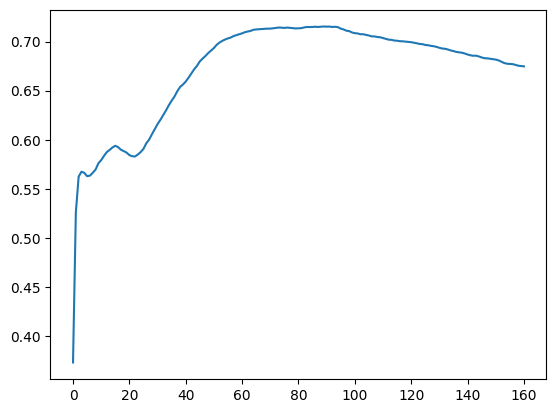

In [44]:
from matplotlib import pyplot as plt
plt.plot(nn1.accu)

In [ ]:
h_pos, h_neg = nn1.train(x_pos, x_neg)

Epoch 1/60, Loss: -20733.8110
[7 2 1 ... 9 8 6] [7 2 1 ... 4 5 6]

 [7 2 1 0 4 1 4 9 6 9 0 2 9 0 1 8 9 7 2 4 7 6 6 8 4 0 7 4 0 1] 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Accuracy: 0.7083
Epoch 2/60, Loss: -21330.6058
[7 2 1 ... 9 8 6] [7 2 1 ... 4 5 6]

 [7 2 1 0 4 1 4 9 6 9 0 2 9 0 1 8 9 7 2 4 7 6 6 8 4 0 7 4 0 1] 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Accuracy: 0.7095
Epoch 3/60, Loss: -21938.2862
[7 2 1 ... 9 8 6] [7 2 1 ... 4 5 6]

 [7 2 1 0 4 1 4 9 6 9 0 2 9 0 1 8 9 7 2 4 7 6 6 8 4 0 7 4 0 1] 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Accuracy: 0.7101
Epoch 4/60, Loss: -22556.9565
[7 2 1 ... 9 8 6] [7 2 1 ... 4 5 6]

 [7 2 1 0 4 1 4 9 6 9 0 2 9 0 1 8 9 7 2 4 7 6 6 8 4 0 7 4 0 1] 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Accuracy: 0.7108
Epoch 5/60, Loss: -23186.7129
[7 2 1 ... 9 8 6] [7 2 1 ... 4 5 6]

 [7 2 1 0 4 1 4 9 6 9 0 2 9 0 1 8 9 7 2 4 7 6 6 8 4 0 7 4 0 1] 
 [7 2 1 0 4 1 4 9 5 9 0 6

In [ ]:
y_pred = nn1.predict(X_test)
y_true = np.argmax(y_test, axis=1)
accuracy = nn1.eval(y_pred, y_true)
accuracy

0.526

In [ ]:
h_pos = nn1.forward(x_pos)
h_neg = nn1.forward(x_neg)


In [ ]:
h_pos.shape

(60000, 784)

In [ ]:
nn2 = FFLayer(hidden_size, hidden_size)
nn2.train(h_pos, h_neg)

Epoch 1/60, Loss: -401721.0982
[6 6 0 ... 6 6 6] [7 2 1 ... 4 5 6]

 [6 6 0 2 6 6 6 6 2 6 6 6 6 2 2 6 6 6 6 6 2 6 6 6 6 6 6 6 2 6] 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Accuracy: 0.0883
Epoch 2/60, Loss: -511001.7264
[6 6 6 ... 6 6 6] [7 2 1 ... 4 5 6]

 [6 6 6 2 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 2 6] 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Accuracy: 0.0924
Epoch 3/60, Loss: -626536.1816
[6 6 6 ... 6 6 6] [7 2 1 ... 4 5 6]

 [6 6 6 2 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 2 6] 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Accuracy: 0.0952
Epoch 4/60, Loss: -748840.3290
[6 6 6 ... 6 6 6] [7 2 1 ... 4 5 6]

 [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6] 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Accuracy: 0.0965
Epoch 5/60, Loss: -878514.4452
[6 6 6 ... 6 6 6] [7 2 1 ... 4 5 6]

 [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6] 
 [7 2 1 0 4 1 4 9 5 

KeyboardInterrupt: 